# Normal vs Leveraged Gains

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Markdown, Latex

# if os.path.exist(os.path.expanduser('~/.jupyter/custom/custom.css')):
darkmode = False

# If you have Jupyter Theme [https://github.com/dunovank/jupyter-themes]
# jt -t monokai -tfs 14 -ofs 11 -nfs 10 -dfs 12 -fs 11 -lineh 150
# darkmode = True

## Gain Generator

The `gain_generator()` function produces a series of random daily gains. The default parameters produces a cummulative gain of 10% (`target = 1.1`) over 200 days (`count = 200`), with a daily standard deviation of 2% (`m = 0.02`). This closely resembles the SP-500. Users may also choose a uniform distribution by setting the keyword `normal` to `False`.

In [2]:
def gain_generator(target=1.1, count=200, m=0.02, verbose=0, normal=True):
    if normal:
        # Normally distributed numbers
        d = m * np.random.normal(size=count)
    else:
        # Uniform random numbers in between [-m, +m]
        d = 2.0 * m * np.random.random(count) - m
    # Force day 0 to be 0
    d[0]= 0.0
    # Find a gain that produces desired cumulative gain at the end of the period
    k = 0
    offset = 0;
    x = np.ones((count))
    while k < 20:
        x[1:] = 1.0 + d[1:] + offset
        ret = np.prod(x)
        delta = np.prod(x) - target
        if verbose:
            print('{:3d}  o = {:.6f} -> {:.6f}  {:+9.6f}'.format(k, offset, ret, delta))
        if abs(delta) < 1.0e-5:
            break
        offset -= 1.0 / count * delta
        k += 1
    return x - 1.0

In [3]:
# g = gain_generator()
# np.std(g)

In [4]:
fs = 0.5
if darkmode:
    edgecolor = 'white'
    facecolor = (1, 1, 1, 0.1)
    green_edge = '#99ff99'
    red_edge = '#ff9999'
    clr1 = '#4396f6'
    clr2 = '#bbff33'
    cmap = 'plasma'
else:
    edgecolor = 'black'
    facecolor = (0, 0, 0, 0.05)
    green_edge = '#004400'
    red_edge = '#440000'
    clr1 = '#4396f6'
    clr2 = '#33aa00'
    cmap = 'YlGnBu'

context_properties = {
    'font.family': 'sans-serif',
    'figure.frameon': False,
    'figure.facecolor': (0, 0, 0, 0),
    'axes.edgecolor': edgecolor,
    'axes.facecolor': facecolor,
    'axes.labelcolor': edgecolor,
    'axes.linewidth': 1.0 * fs,
    'axes.titlepad': 14.0,
    'axes.xmargin': 0,
    'axes.ymargin': 0,
    'grid.color': edgecolor,
    'hatch.color': edgecolor,
    'patch.edgecolor': edgecolor,
    'text.color': edgecolor,
    'xtick.color': edgecolor,
    'xtick.direction': 'in',
    'xtick.major.pad': 9.0 * fs,
    'xtick.major.size': 4.0 * fs,
    'xtick.major.width': 1.0 * fs,
    'ytick.color': edgecolor,
    'ytick.direction': 'in',
    'ytick.major.pad': 9.0 * fs,
    'grid.color': edgecolor,
    'grid.alpha': 0.1,
    'legend.frameon': False,
    'legend.framealpha': 0.15,
}
plt.rcParams['font.sans-serif'] = 'Arial'

## Simulation

This simulation emulates a random daily return with the targeted compound gain and a 3x leveraged return

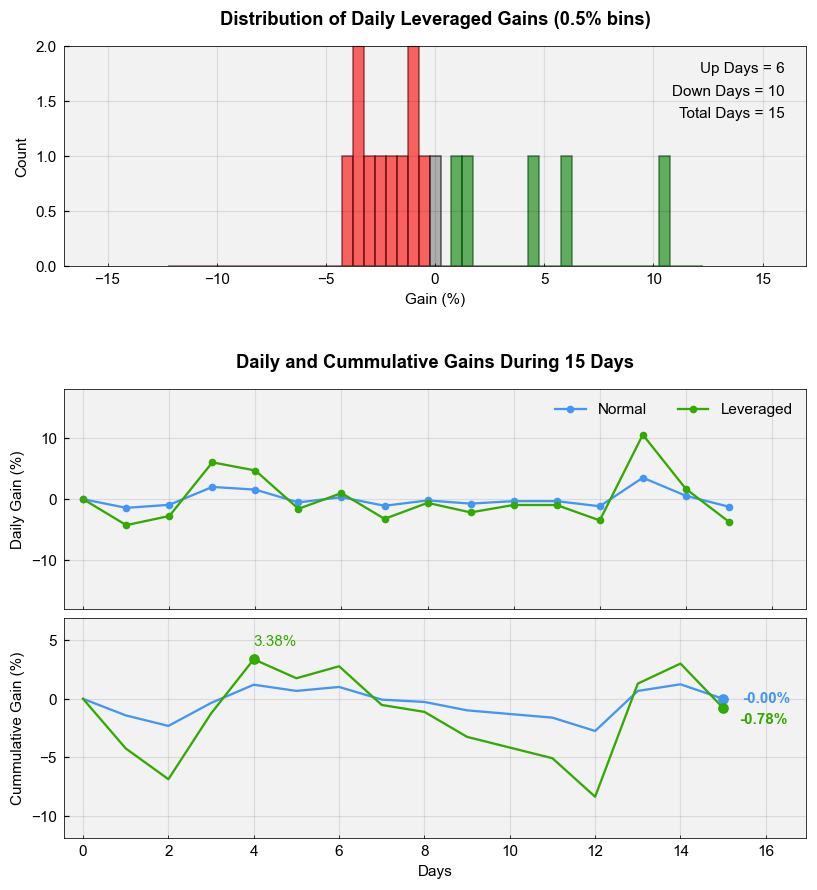

In [5]:
# Typical growth, low volatility derivative, e.g., NEED, DUSL, UTLS
# m = 0.005; gain = 1.08; count = 200

# Typical growth, moderate volatility, e.g., SPXL,
# m = 0.01; gain = 1.2; count = 400
# m = 0.01; gain = 1.1; count = 200

# High growth, high volatility, e.g., TQQQ, TECL
# m = 0.018; gain = 1.08; count = 100
m = 0.018; gain = 1.00; count = 15
# m = 0.018; gain = 0.95; count = 25
# m = 0.018; gain = 1.015; count = 40
# m = 0.018; gain = 0.96; count = 40
# m = 0.018; gain = 0.96; count = 20

# Speculative, ultra short-term
# m = 0.02; gain = 1.05; count = 10

# Simulation
g = gain_generator(gain, count=count+1, m=m)
t = np.arange(len(g))
n = np.prod(1.0 + g)
l = np.prod(1.0 + 3.0 * g)
cn = 100 * (np.cumprod(1 + g) - 1)
cl = 100 * (np.cumprod(1 + 3.0 * g) - 1)
lo = np.min(cl)
hi = np.max(cl)
hh = hi - lo
markersize = 8
delta = 0.5
tm, vm = np.argmax(cl), np.max(cl)

with plt.rc_context(context_properties):
    # Distribution of the Gains
    fig = plt.figure(dpi=110, figsize=(7.5, 8))
    fig.add_axes((0.05, 0.7, 0.9, 0.25))
    b = np.arange(-12 - 0.5 * delta, 12 + delta, delta)
    n, _, patches = plt.hist(300 * g, bins=b, alpha=0.6)
    for b, p in zip(b, patches):
        if b < -0.5 * delta:
            p.set_facecolor('red')
            p.set_edgecolor(red_edge)
        elif b < 0.5 * delta:
            p.set_facecolor('grey')
            p.set_edgecolor(edgecolor)
        else:
            p.set_facecolor('green')
            p.set_edgecolor(green_edge)
    plt.text(16, 0.93 * max(n), 'Up Days = {}\nDown Days = {}\nTotal Days = {}'.format(
        np.sum(g >= 0), np.sum(g < 0), count), linespacing=1.8, va='top', ha='right')
    plt.grid()
    plt.xlim((-17, 17))
    plt.xlabel('Gain (%)')
    plt.ylabel('Count')
    plt.title('Distribution of Daily Leveraged Gains ({:.1f}% bins)'.format(delta), fontweight=800)

    # Raw Gain Values
    ax = plt.axes((0.05, 0.31, 0.9, 0.25))
    if len(t) <= 50:
        marker = '.'
    else:
        marker = ''
    ax.plot(t, 100.0 * g, marker=marker, markersize=markersize, color=clr1, label='Normal')
    ax.plot(t, 300.0 * g, marker=marker, markersize=markersize, color=clr2, label='Leveraged')
    ax.set_xlim((-0.03 * count, 1.12 * count))
    ax.set_ylim((-18, 18))
    ax.grid()
    ax.legend(loc='upper right', ncol=2)
    ax.set_xticklabels([''] * len(ax.get_xticklabels()))
    ax.set_ylabel('Daily Gain (%)')
    ax.set_title('Daily and Cummulative Gains During {} Days'.format(count), fontweight=800)

    # Cumulative Gain Over the Period
    ax = fig.add_axes((0.05, 0.05, 0.9, 0.25))
    ax.plot(t, cn, label='Normal', color=clr1)
    ax.plot(t, cl, label='Leveraged', color=clr2)
    ax.plot(t[-1], cn[-1], marker='o', color=clr1)
    ax.text(t[-1] * 1.03, cn[-1], '{:.2f}%'.format(cn[-1]), color=clr1, va='center', fontweight=600)
    ax.plot(t[-1], cl[-1], marker='o', color=clr2)
    if cl[-1] > cn[-1]:
        y = max(cl[-1], cn[-1] + 0.15 * hh)
    else:
        y = min(cl[-1], cn[-1] - 0.15 * hh)
    ax.text(t[-1] * 1.025, y, '{:.2f}%'.format(cl[-1]), color=clr2, va='center', fontweight=600)
    if tm != t[-1]:
        ax.plot(tm, vm, marker='o', color=clr2)
        ax.text(tm, vm + 0.1 * hh, '{:.2f}%'.format(vm), color=clr2)
    ax.set_xlim((-0.03 * count, 1.13 * count))
    ax.set_ylim(lo - 0.3 * hh, hi + 0.3 * hh)
    ax.grid()
    ax.set_xlabel('Days')
    ax.set_ylabel('Cummulative Gain (%)')

In [6]:
plt.close()

## Multiple Realizations

In [7]:
r = 1000
gg = np.zeros((r, count+1))
for k in range(r):
    gg[k, :] = gain_generator(gain, count+1, m=m)
u = np.sum(gg >= 0, axis=1)                                         # Up Days
n = np.prod(1 + gg, axis=1)                                         # Normal gains
l = np.prod(1 + 3 * gg, axis=1)                                     # Leverage gains
h = np.cumprod(1 + 3 * gg, axis=1)                                  # Leverage gain history
n = 100 * (n - 1)                                                   # n in percentage
l = 100 * (l - 1)                                                   # l in percentage
h = 100 * (h - 1)                                                   # h in percentage
e = np.vstack((np.min(h, axis=1), np.max(h, axis=1))).transpose()   # Extreme gains
x = np.mean(e, axis=0)                                              # Average of extreme gains

# Table header
lab = {True: '+', False: '-'}
output  = '| \# | Up Days | Normal Return | Leveraged Return | Extremes | Has Positve | Better? |\n'
output += '| --: | --: | :-: | :-: | --: | :-: | :-: |\n'

for k in range(min(10, gg.shape[0])):
    output += ('| {} | {:3d} ({:.1f}%) | {:+.2f}% | {:+.2f}% '
               '| {:+.1f}%, {:+.1f}% | {} | {} |\n').format(
        k + 1, u[k], 100 * u[k] / count, n[k], l[k],
        e[k, 0], e[k, 1], lab[e[k, 1] > 1], lab[l[k] > n[k]])

output += '| : | : | : | : | : | : | : |\n'
output += '||\n'
output += ('| **Average** | **{:.1f} ({:.1f}%)** | **{:+.2f}%** | **{:+.2f}%** '
           '| **{:+5.1f}%, {:+5.1f}%**<br/>**( {:+5.1f}%, {:+5.1f}% )** '
           '| **{:.2f}%** | **{:.2f}%** |\n').format(
    np.mean(u), 100 * np.mean(u) / count, np.mean(n), np.mean(l),
    np.min(e[:, 0]), np.max(e[:, 1]), np.mean(e[:, 0]), np.mean(e[:, 1]),
    100 * np.mean(e[:, 1] > 1), 100 * np.mean(l > n))

display(Markdown(output))

| \# | Up Days | Normal Return | Leveraged Return | Extremes | Has Positve | Better? |
| --: | --: | :-: | :-: | --: | :-: | :-: |
| 1 |   7 (46.7%) | -0.00% | -1.23% | -6.4%, +5.9% | + | - |
| 2 |   9 (60.0%) | +0.00% | -0.66% | -7.9%, +5.5% | + | - |
| 3 |   7 (46.7%) | -0.00% | -0.96% | -10.2%, +0.6% | - | - |
| 4 |   8 (53.3%) | +0.00% | -1.29% | -16.3%, +5.5% | + | - |
| 5 |   8 (53.3%) | +0.00% | -1.84% | -21.5%, +4.3% | + | - |
| 6 |   8 (53.3%) | -0.00% | -1.25% | -17.4%, +0.0% | - | - |
| 7 |   8 (53.3%) | +0.00% | -1.91% | -20.2%, +0.0% | - | - |
| 8 |  10 (66.7%) | +0.00% | -2.46% | -9.9%, +12.9% | + | - |
| 9 |   9 (60.0%) | +0.00% | -1.68% | -15.9%, +0.0% | - | - |
| 10 |  10 (66.7%) | -0.00% | -1.47% | -6.0%, +18.3% | + | - |
| : | : | : | : | : | : | : |
||
| **Average** | **8.6 (57.1%)** | **+0.00%** | **-1.36%** | **-33.8%, +51.9%**<br/>**(  -9.9%, +10.2% )** | **88.90%** | **0.00%** |


# Ensemble Heat Map

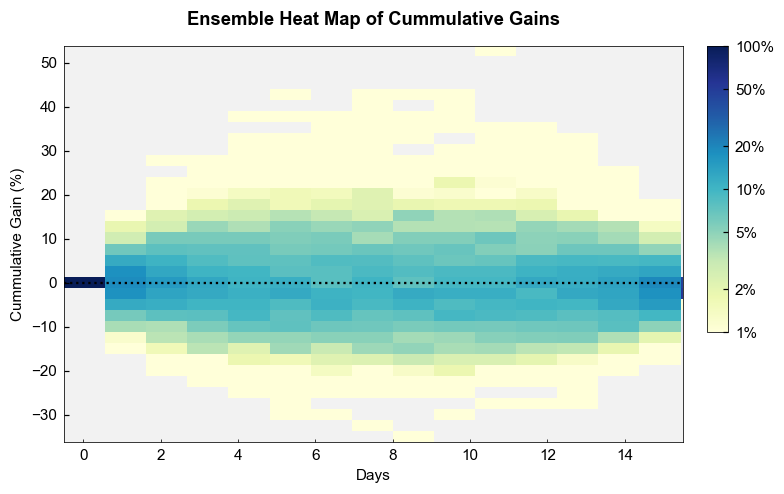

In [8]:
phi = 5 * delta
lo = np.floor(np.min(h) / phi) * phi
hi = np.ceil(np.max(h) / phi) * phi
b = np.arange(lo - 0.5 * phi, hi + phi, phi)
c = np.zeros((len(b) - 1, gg.shape[1]))
for k in range(gg.shape[1]):
    c[:, k], _ = np.histogram(h[:, k], bins=b)
c /= r
valid = c > 0
c[valid] = np.log10(c[valid])
c[~valid] = np.nan
with plt.rc_context(context_properties):
    fig = plt.figure(dpi=110, figsize=(7.5, 4))
    ax = fig.add_axes((0.05, 0.05, 0.75, 0.9))
    ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
    ax.plot([-0.5, gg.shape[1] + 0.5], [0, 0], linestyle=':', color=edgecolor)
    msh = ax.pcolorfast(np.arange(-0.5, gg.shape[1] + 1), b, c, vmin=-2, vmax=0, cmap=cmap)
    cax = fig.add_axes((0.83, 0.3, 0.025, 0.65))
    cb = fig.colorbar(msh, cax=cax, ticks=np.log10([0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]))
    cb.ax.set_yticklabels(['1%', '2%', '5%', '10%', '20%', '50%', '100%'])
    ax.set_xlim((-0.5, gg.shape[1] - 0.5))
    ax.set_xlabel('Days')
    ax.set_ylabel('Cummulative Gain (%)')
    ax.set_title('Ensemble Heat Map of Cummulative Gains', fontweight=800)